<a href="https://colab.research.google.com/github/Prasun1608/Deep-Learning-Projects/blob/main/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Data and Libraries**

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization, Dropout, Embedding
from keras.activations import relu, sigmoid

from sklearn.preprocessing import StandardScaler


**Simple preprocessiong on Data and EDA using Graphs**

In [ ]:
#Simple EDA
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
sum(data.duplicated())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


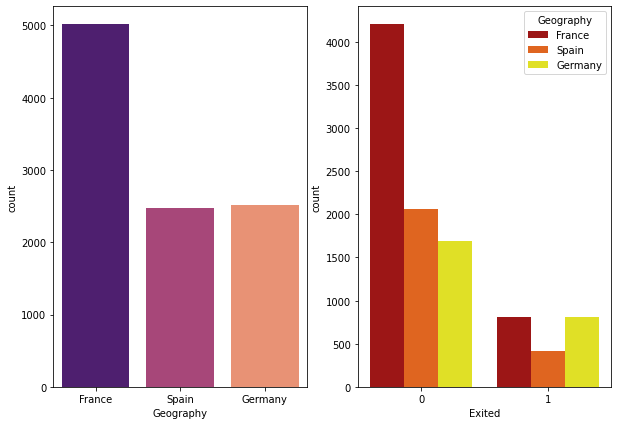

In [ ]:
f, ax = plt.subplots(1,2, figsize=(10,7))
sns.countplot(data['Geography'], ax=ax[0],  palette='magma')
sns.countplot(data['Exited'], hue= data['Geography'],ax=ax[1], palette='hot')

#France and Germany have almost same no of customers exited. But Germany has higher proportion of Exited customers than France. France has highest proportion of non exited customers.

In [ ]:
data.groupby(['Exited','Geography']).size()

Exited  Geography
0       France       4204
        Germany      1695
        Spain        2064
1       France        810
        Germany       814
        Spain         413
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


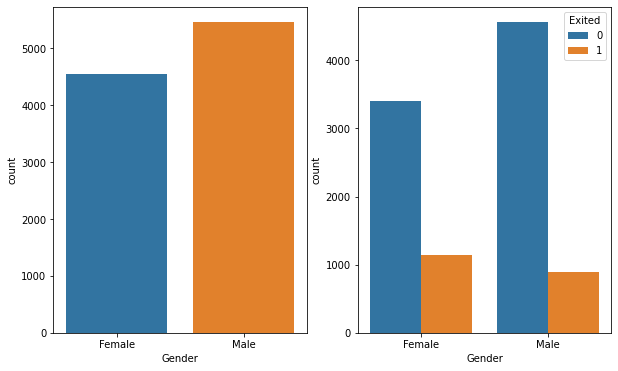

In [ ]:
#Gender relationship

f,ax= plt.subplots(1,2, figsize=(10,6))
sns.countplot(data['Gender'], ax=ax[0])
sns.countplot(data['Gender'], hue=data['Exited'], ax=ax[1])

In [ ]:
data.value_counts(['Gender', 'Exited'], normalize=True)*100

#So females leave more than males


Gender  Exited
Male    0         45.59
Female  0         34.04
        1         11.39
Male    1          8.98
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


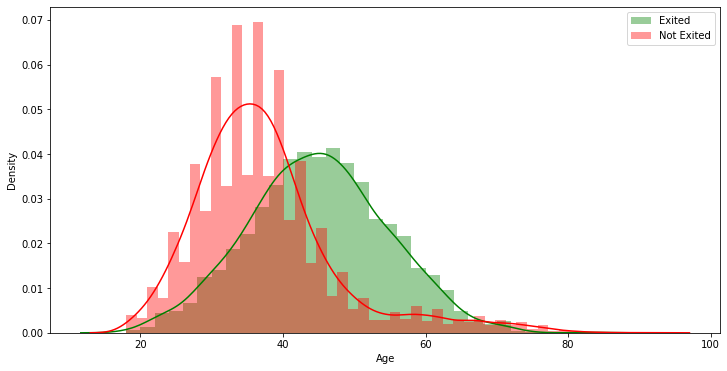

In [ ]:
#Age
plt.figure(figsize=(12,6))
sns.distplot(data[data['Exited']==1]['Age'], color='green', label='Exited')
sns.distplot(data[data['Exited']==0]['Age'], color='red', label='Not Exited')

plt.legend()

#So if a person has higher age, ie b/w 40-50, he is more likely to Exit 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


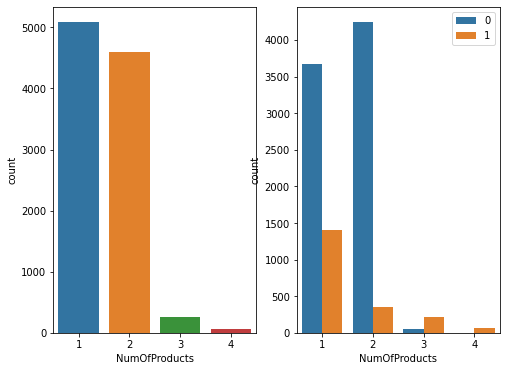

In [ ]:
#No of products
#If a customer has more productrs will it stay or will it exit

f,ax= plt.subplots(1,2, figsize=(8,6))
sns.countplot(data['NumOfProducts'], ax=ax[0])
sns.countplot(data['NumOfProducts'],hue=data['Exited'], ax=ax[1])

plt.legend(loc='upper right')


#Proportion of Exited is more in case customer buys 3 or 4 products.

In [ ]:
pd.crosstab(data.NumOfProducts, data.Exited).apply(lambda r: r/r.sum()*100, axis=1)

#Use this to get percentage values. Also axis=1 means do it row wise
#In case no of products brought is 3 or 4, exit ratio is higher


Exited,0,1
NumOfProducts,,
1,72.285602,27.714398
2,92.418301,7.581699
3,17.293233,82.706767
4,0.000000,100.000000


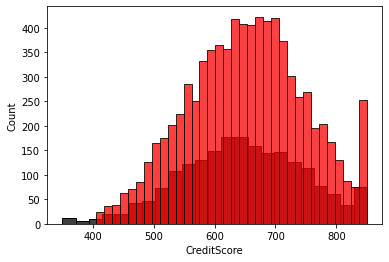

In [ ]:
#creditscore

sns.histplot(data[data['Exited']==1]['CreditScore'], color='black')
sns.histplot(data[data['Exited']==0]['CreditScore'], color='red')

#people with high credit score stays longer and does not leave


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


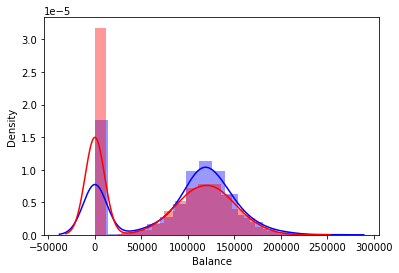

In [ ]:
#Money in acoount
sns.distplot(data[data['Exited']==1]['Balance'], color='blue')
sns.distplot(data[data['Exited']==0]['Balance'], color='red')

#people with more money will exit somre than stay
#people with less amount tend to stay more


In [ ]:
#Imapct of credit card

pd.crosstab(data.HasCrCard, data.Exited).apply(lambda r: r/r.sum()*100, axis=1)

#So having or not having credit card does not show that much influence on the Exited feature


Exited,0,1
HasCrCard,,
0,79.185059,20.814941
1,79.815734,20.184266


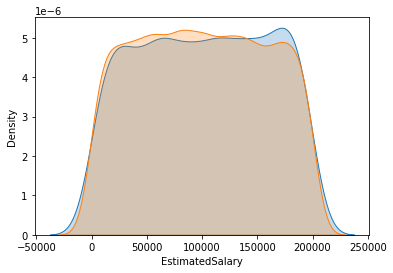

In [ ]:
sns.kdeplot(data[data['Exited']==1]['EstimatedSalary'], fill='red')
sns.kdeplot(data[data['Exited']==0]['EstimatedSalary'], fill='blue')

#SO salary does not have impact on exiting or not

**Finding Some Correlation Patterns**

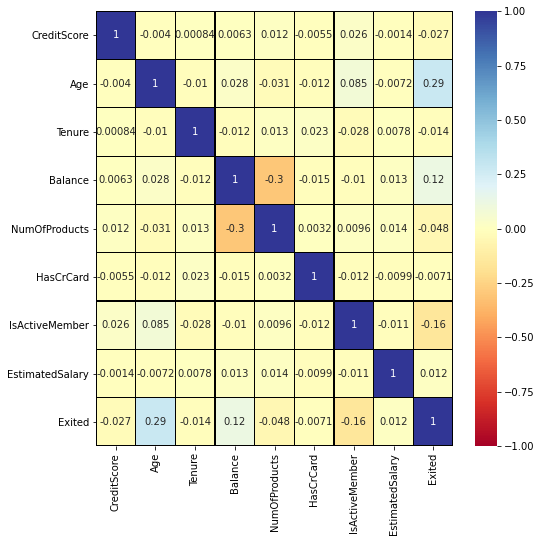

In [ ]:
#Correlation ANalysis
plt.figure(figsize=(8,8))
sns.heatmap(data.iloc[:,2:].corr(), annot=True, cmap='RdYlBu', linewidths=0.2, linecolor='black', vmin=-1, vmax=1)

In [ ]:
#We start prediction analysis
x= data.iloc[:,3:13].values
y= data.iloc[:,13:].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#OneHotEncoder will create dummy variable (seperate columns) for each value and may lead to problem of Dummy Variable Trap where dummy variables are highly correlated.
#LabelEncoder will do it alphabetically for all in the same column. The problem is that it uses alphabetical order for assigning rank labels and it is possible that model when training captures this as one of the feature when it is really not

label_x1= LabelEncoder()

x[:,1]= label_x1.fit_transform(x[:,1])
x[:,2]= label_x1.fit_transform(x[:,2])

**Data Modelling**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
#In layman's terms, fit_transform means to do some calculation and then do transformation (say calculating the means of columns from some data and then replacing the missing values). So for training set, you need to both calculate and do transformation.
#But for testing set, Machine learning applies prediction based on what was learned during the training set and so it doesn't need to calculate, it just performs the transformation.


sc= StandardScaler()

x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model(layers, activation):
  model=Sequential()
  for i, nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes, input_dim= x_train.shape[1] )) 
      model.add(Activation(activation))

    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))

  model.add(Dense(1))
  
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

model= KerasClassifier(build_fn=create_model, verbose=1)

In [ ]:
model

In [ ]:
layers=[(20), (40,20), (45,30,15)]
activations=('sigmoid', 'relu')
param_grid= dict(layers=layers, activation=activations, batch_size=[128,256], epochs=[10])
grid= GridSearchCV(estimator=model, param_grid= param_grid)


In [ ]:
grid_result= grid.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'int' object is not iterable

  FitFailedWarning)


Epoch 1/10
50/50 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7888
Epoch 2/10
50/50 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.8007
Epoch 3/10
50/50 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.8086
Epoch 4/10
50/50 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.7974
Epoch 5/10
50/50 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.7905
Epoch 6/10
50/50 [==============================] - 0s 1ms/step - loss: 0.4504 - accuracy: 0.7936
Epoch 7/10
50/50 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.7990
Epoch 8/10
50/50 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.7981
Epoch 9/10
50/50 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.7974
Epoch 10/10
13/13 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.7831
Epoch 1/10
50/50 [=

In [ ]:
[grid_result.best_score_, grid_result.best_params_]

[0.8257500052452087,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 10,
  'layers': (45, 30, 15)}]

**Making Preddictions using the Best Parameters found by GridSearch**

In [ ]:
pred_y= grid.predict(x_test)
pred_y

16/16 [==============================] - 0s 1ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
predicted= pred_y>0.5
predicted

array([0])

**Confusion Matrix and Accuracy Scores**

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predicted)
cm

array([[1595,    0],
       [ 405,    0]])

In [ ]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test, predicted)
score

0.7975